# Introduction to regression with Neural Network in TensorFlow
The are are many definitions for regression problem, but in our case, we're going to simplify it: predicting a numerical variable based on some other combination variables, even shorter... predicting a number.

In [1]:
# Import TensorFlow
import tensorflow as tf
print(tf.__version__)

2.18.0


## Creating data to view and fit


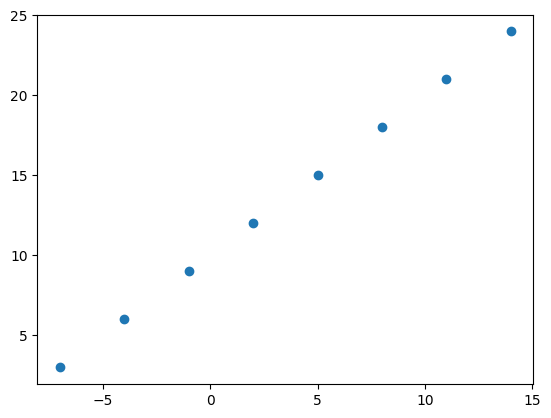

In [ ]:
from os import X_OK
import numpy as np
import matplotlib.pyplot as plt

# Create features
X = np.array([-7.0, -4.0, -1.0, 2.0, 5.0, 8.0, 11.0, 14.0 ])

# Create labels
Y = np.array([3.0, 6.0, 9.0, 12.0, 15.0, 18.0, 21.0, 24.0 ])

# Visualize it
plt.scatter(X, Y)


In [ ]:
Y == X + 10

array([ True,  True,  True,  True,  True,  True,  True,  True])

In [ ]:
# Crete a demo tensor  for our housing price prediction problem
house_info = tf.constant(["bedroom", "bathroom", "garage"])
house_price = tf.constant([939700])
house_info, house_price

(<tf.Tensor: shape=(3,), dtype=string, numpy=array([b'bedroom', b'bathroom', b'garage'], dtype=object)>,
 <tf.Tensor: shape=(1,), dtype=int32, numpy=array([939700], dtype=int32)>)

In [ ]:
X[0], Y[0]

(-7.0, 3.0)

In [ ]:
X[1], Y[1]

(-4.0, 6.0)

In [ ]:
input_shape = X[0].shape
output_shape = Y[0].shape
input_shape, output_shape

((), ())

In [ ]:
X[0].ndim

0

In [ ]:
X[0], Y[0]

(-7.0, 3.0)

In [ ]:
# Turn our NumPy arrays into tensors
X = tf.constant(X)
Y = tf.constant(Y)
X, Y

(<tf.Tensor: shape=(8,), dtype=float64, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.])>,
 <tf.Tensor: shape=(8,), dtype=float64, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.])>)

In [ ]:
# # Turn our NumPy arrays into TensorFlow tensors with dtype flaot32
# X = tf.cast(tf.constant(X), dtype=tf.float32)
# Y = tf.cast(tf.constant(Y), dtype=tf.float32)


In [ ]:
input_shape = X[0].shape
output_shape = Y[0].shape
input_shape, output_shape

(TensorShape([]), TensorShape([]))

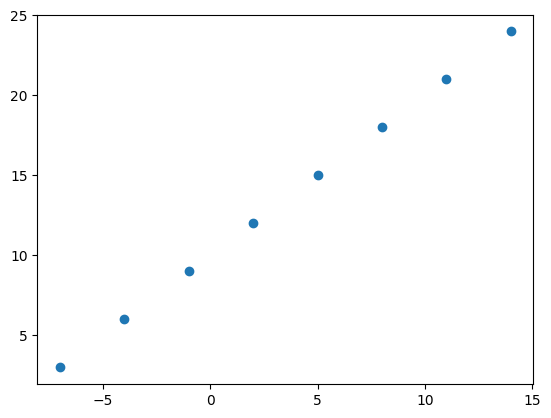

In [ ]:
plt.scatter(X,Y)

## Steps in modelling with TensorFlow

1. **Create a model** - define the input and output layers, as well as the hidden layers of neural network.
2. **Compiling a model** - define the loss function (in other words, the function which tells our model how wrong it is) and the optimizer (tell our model how to improve  the pattern its learning) and evaluation metrics (what we can use to interpret the performance of our model).
3. **Fitting a model** - letting the model try to find patterns between X & Y(features and labels).

In [ ]:
## Other ways of Creating a model
# # Optionally, the first layer can receive an `input_shape` argument:
# model = tf.keras.Sequential()
# model.add(tf.keras.layers.Dense(8, input_shape=(16,)))

# # Afterwards, we do automatic shape inference:
# model.add(tf.keras.layers.Dense(4))

# model = tf.keras.Sequential()
# model.add(tf.keras.layers.Dense(1))

In [ ]:
# Set random  seed
tf.random.set_seed(42)

# 1. Create a model using the Sequential API
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model.compile(loss=tf.keras.losses.mae, # mae is short form for mean absolute error
              optimizer = tf.keras.optimizers.SGD(), # sgd is short form for stochastic gradient descent
              metrics="mae")

# 3. Fit the model
# model.fit(X, Y, epochs=5) --> This will break the code
model.fit(tf.expand_dims(X, axis=-1), Y, epochs = 5) # UPDATED

Epoch 1/5
1/1 [==============================] - 0s 328ms/step - loss: 13.7075 - mae: 13.7075
Epoch 2/5
1/1 [==============================] - 0s 5ms/step - loss: 13.5750 - mae: 13.5750
Epoch 3/5
1/1 [==============================] - 0s 5ms/step - loss: 13.4425 - mae: 13.4425
Epoch 4/5
1/1 [==============================] - 0s 5ms/step - loss: 13.3100 - mae: 13.3100
Epoch 5/5
1/1 [==============================] - 0s 5ms/step - loss: 13.1775 - mae: 13.1775


In [ ]:
# Check out X and Y
X, Y

(<tf.Tensor: shape=(8,), dtype=float64, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.])>,
 <tf.Tensor: shape=(8,), dtype=float64, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.])>)

In [ ]:
# Try and make a predictiion using our model
Y_pred = model.predict([17])
Y_pred

1/1 [==============================] - 0s 99ms/step


array([[2.0171237]], dtype=float32)

In [ ]:
Y_pred + 11

array([[13.017124]], dtype=float32)

## Improving our model

We can improve our model, by altering the steps we took to create a model.

1. **Creating a model** - here we  add more layers, increase the number of hiden units/layers(also called neurons) within each of hidden layers, change the activation function of each layers.
2. **Compiling a model** -  here we might change the optimization function or perhaps the **learning rate** of the seed optimization dunction.
3. **Fitting a model** - here we might fit a model for more **epochs** (leave it training for longer) or on more data(give the model more examples to learn from).

In [ ]:
# Let's rebuild our model

# 1. Create the model
model = tf.keras.Sequential([
  tf.keras.layers.Dense(1)
])

# 2. Compile the model
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(),
              metrics=["mae"])

# 3. Fit the model (this time we'll train for longer)
model.fit(tf.expand_dims(X, axis=1), Y, epochs=100)




Epoch 1/100
1/1 [==============================] - 0s 266ms/step - loss: 11.9655 - mae: 11.9655
Epoch 2/100
1/1 [==============================] - 0s 6ms/step - loss: 11.8330 - mae: 11.8330
Epoch 3/100
1/1 [==============================] - 0s 5ms/step - loss: 11.7005 - mae: 11.7005
Epoch 4/100
1/1 [==============================] - 0s 7ms/step - loss: 11.5680 - mae: 11.5680
Epoch 5/100
1/1 [==============================] - 0s 6ms/step - loss: 11.4355 - mae: 11.4355
Epoch 6/100
1/1 [==============================] - 0s 6ms/step - loss: 11.3030 - mae: 11.3030
Epoch 7/100
1/1 [==============================] - 0s 6ms/step - loss: 11.1705 - mae: 11.1705
Epoch 8/100
1/1 [==============================] - 0s 6ms/step - loss: 11.0380 - mae: 11.0380
Epoch 9/100
1/1 [==============================] - 0s 5ms/step - loss: 10.9055 - mae: 10.9055
Epoch 10/100
1/1 [==============================] - 0s 5ms/step - loss: 10.7730 - mae: 10.7730
Epoch 11/100
1/1 [==============================] - 0s 5m

In [ ]:
# Remind ourselves  of the data
X, Y

(<tf.Tensor: shape=(8,), dtype=float64, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.])>,
 <tf.Tensor: shape=(8,), dtype=float64, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.])>)

In [ ]:
# Let's if our model prediction has improved
model.predict([17.0])

1/1 [==============================] - 0s 72ms/step


array([[29.71348]], dtype=float32)

In [ ]:
# Practising creating a model

# 1. Creata a model
model = tf.keras.Sequential([
  tf.keras.layers.Dense(100, activation="relu"),
  tf.keras.layers.Dense(100, activation="relu"),
  tf.keras.layers.Dense(1)

])

# 2. Compile the model
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.Adam(lr=0.0001),
              metrics=["mae"])

# 3. Fit the model(this time, we'll trains for longer)
model.fit(tf.expand_dims(X, axis=1), Y, epochs=5)


Epoch 1/5
1/1 [==============================] - 1s 637ms/step - loss: 13.3470 - mae: 13.3470
Epoch 2/5
1/1 [==============================] - 0s 6ms/step - loss: 13.0822 - mae: 13.0822
Epoch 3/5
1/1 [==============================] - 0s 5ms/step - loss: 12.8264 - mae: 12.8264
Epoch 4/5
1/1 [==============================] - 0s 6ms/step - loss: 12.5768 - mae: 12.5768
Epoch 5/5
1/1 [==============================] - 0s 5ms/step - loss: 12.3283 - mae: 12.3283


In [ ]:
# REminding what  X and Y are
X, Y

(<tf.Tensor: shape=(8,), dtype=float64, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.])>,
 <tf.Tensor: shape=(8,), dtype=float64, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.])>)

In [ ]:
# Let's if our model has improved
model.predict([17.0])

1/1 [==============================] - 0s 83ms/step


array([[3.1623766]], dtype=float32)

In [ ]:
# Let's see if we can make another to improve our model

# 1. Create the model (this time with extra hidden layer with 100 hidden units)
model = tf.keras.Sequential([
  tf.keras.layers.Dense(50, activation=None),
  tf.keras.layers.Dense(1),

])

# 2. Compile the model
model.compile(loss="mae",
              optimizer=tf.keras.optimizers.Adam(lr=0.01),
              metrics=["mae"])

# 3. Fit the model
model.fit(tf.expand_dims(X, axis=1), Y, epochs=100)



Epoch 1/100
1/1 [==============================] - 0s 461ms/step - loss: 11.9050 - mae: 11.9050
Epoch 2/100
1/1 [==============================] - 0s 5ms/step - loss: 11.8279 - mae: 11.8279
Epoch 3/100
1/1 [==============================] - 0s 5ms/step - loss: 11.7506 - mae: 11.7506
Epoch 4/100
1/1 [==============================] - 0s 5ms/step - loss: 11.6733 - mae: 11.6733
Epoch 5/100
1/1 [==============================] - 0s 5ms/step - loss: 11.5959 - mae: 11.5959
Epoch 6/100
1/1 [==============================] - 0s 5ms/step - loss: 11.5184 - mae: 11.5184
Epoch 7/100
1/1 [==============================] - 0s 4ms/step - loss: 11.4408 - mae: 11.4408
Epoch 8/100
1/1 [==============================] - 0s 5ms/step - loss: 11.3632 - mae: 11.3632
Epoch 9/100
1/1 [==============================] - 0s 5ms/step - loss: 11.2854 - mae: 11.2854
Epoch 10/100
1/1 [==============================] - 0s 5ms/step - loss: 11.2076 - mae: 11.2076
Epoch 11/100
1/1 [==============================] - 0s 5m

In [ ]:
#Lets remind the data
X, Y

(<tf.Tensor: shape=(8,), dtype=float64, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.])>,
 <tf.Tensor: shape=(8,), dtype=float64, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.])>)

In [ ]:
# Let's try to make a prediction
model.predict([17])

1/1 [==============================] - 0s 79ms/step


array([[31.0804]], dtype=float32)

 **Learning rate(lr)** is the most important hyperparameter in neural networks

### Improving a model

**Common ways to improve a deep model**
* Adding layers
* Increase the number of hidden layers
* Change the activation model
* Change the optimizer function
* Change the learning rate
* Fitting on more data
* Fittinf for longer

## Evaluating a model

In practise, a typical workflow  you'll go through when building neural networks is: Build

```
Build a model -> fit it -> evaluate it ->tweak a model -> fit it -> evaluate it -> tweak model ->fit a model -> evaluate it -> tweak it..
```

When it comes to evaluation... there are 3 words you should memorize:

>"Visualize, visualize, visualize"

It's a good to visualize:
* The data - what data are we working with? What does it look like?
* The model itself - what does our model look like?
* The training of a model - hpw does a model perform while it learns?
* The prediction of the model - how do the prediction of a model line up against the ground truth(the original labels)?



In [ ]:
# Make a bigger dataset
X = tf.range(-100, 100, 4)
X

<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([-100,  -96,  -92,  -88,  -84,  -80,  -76,  -72,  -68,  -64,  -60,
        -56,  -52,  -48,  -44,  -40,  -36,  -32,  -28,  -24,  -20,  -16,
        -12,   -8,   -4,    0,    4,    8,   12,   16,   20,   24,   28,
         32,   36,   40,   44,   48,   52,   56,   60,   64,   68,   72,
         76,   80,   84,   88,   92,   96], dtype=int32)>

In [ ]:
Y = X + 10
Y

<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([-90, -86, -82, -78, -74, -70, -66, -62, -58, -54, -50, -46, -42,
       -38, -34, -30, -26, -22, -18, -14, -10,  -6,  -2,   2,   6,  10,
        14,  18,  22,  26,  30,  34,  38,  42,  46,  50,  54,  58,  62,
        66,  70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>

([<matplotlib.lines.Line2D at 0x7ea90431ecb0>],)

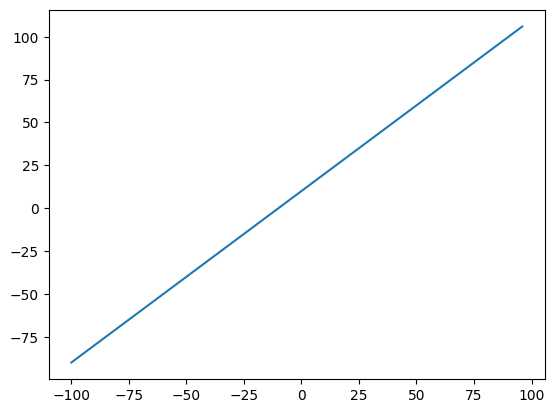

In [ ]:
# Visualize the data
import matplotlib.pyplot as plt

plt.plot(X, Y),

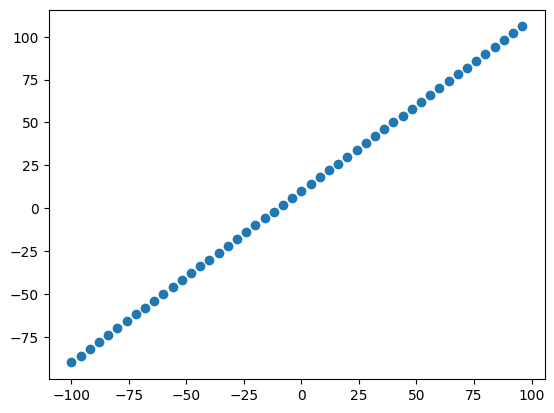

In [ ]:
plt.scatter(X, Y)

### The 3 sets...

*Possibly most important concept in machine learning*

* **Training sets** - the model learns from this data, which is typically 70-80%
* **Validation set** - the model get tuned on this data, which is typically 10-15% of
the data available.
* **Test set** - model gets evaluated on this data to test what it has learned,
this data set is typically 10-15% of the total data available.


**Generalization** - *the ability for a machine learning model to perform well on data it hasn't seen before*

In [ ]:
# Check the length of how many samples we have
len(X), len(Y)


(50, 50)

In [ ]:
# Split the data into train and test sets

# Training set
X_train = X[:40] # first 40 are training samples (80% of the data)
Y_train = Y[:40
            ]
# Testing set
X_test = X[40:]  # The last are test samples (20% of the data)
Y_test = Y[40:]

len(X_train), len(X_test), len(Y_train), len(Y_test)

(40, 10, 40, 10)

### Visualizing the data

Now we've got our data  in training and test sets... let's visualize it again!

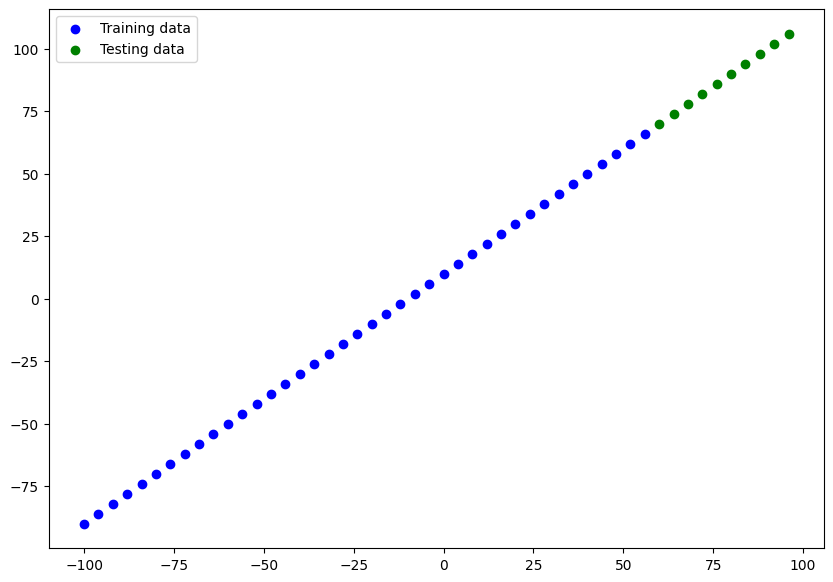

In [ ]:
plt.figure(figsize=(10, 7))
# Plot traing data in blue
plt.scatter(X_train, Y_train, c="b", label="Training data")
# Plot test data in green
plt.scatter(X_test, Y_test, c="g", label="Testing data")
# Show a legend
plt.legend();


In [ ]:
# Let's have a look at how to build a neural network for our data

# 1. Create a model
model = tf.keras.Sequential([
  tf.keras.layers.Dense(1)
])

# 2. Compile the model
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(),
              metrics=["mae"])


# 3. Fit the model
# model.fit(tf.expand_dims(X_train, axis=1), Y_train, epochs=100)

### Visualizing the model


In [ ]:
model.summary()

ValueError: This model has not yet been built. Build the model first by calling `build()` or by calling the model on a batch of data.

In [ ]:
X[0], Y[0]

(<tf.Tensor: shape=(), dtype=int32, numpy=-100>,
 <tf.Tensor: shape=(), dtype=int32, numpy=-90>)

In [ ]:
# Let's create a model which builds automatically by defining the input_shape argument in the first layer
tf.random.set_seed(42)

# Create a model(same as above)
model = tf.keras.Sequential([
    tf.keras.layers.Dense(10, activation="relu", input_shape=[1], name="Input_qatlam"),
   tf.keras.layers.Dense(1, name="Output_qatlam")
], name="model_1")

# 2. Compile the model
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
              metrics=["mae"])

input_layer * Output_layer + Output_layer

In [ ]:
model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Input_qatlam (Dense)        (None, 10)                20        
                                                                 
 Output_qatlam (Dense)       (None, 1)                 11        
                                                                 
Total params: 31 (124.00 Byte)
Trainable params: 31 (124.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


* Total params - total number of parameters in the model
* Trainable params -  these are the parameters(patterns)
the model can update as it trains.
* Non-trainable params - these parameters aren't updated during training ( this is typical when you bring in already learned patterns or parameters from other models during **transfer learning**)

📖**Resource:** For a more in-depth overview of the trainable parameters within a layer, check out MIT's introduction to deep learning video:
http://introtodeeplearning.com/

You tube:
https://www.youtube.com/watch?v=ErnWZxJovaM&list=PLtBw6njQRU-rwp5__7C0oIVt26ZgjG9NI&ab_channel=AlexanderAmini

You tube video: 2020 version
https://www.youtube.com/watch?v=njKP3FqW3Sk&ab_channel=AlexanderAmini


🛠️ **Exercise:** Try playing around with the number of hidden units in the dense layer and see how that effects number of parameters(total and trainable) my calling `model.summary`

In [ ]:
# Let's fit our model to the training data
model.fit(tf.expand_dims(X_train, axis=1), Y_train, epochs=500, verbose=2)

Epoch 1/500
2/2 - 0s - loss: 26.3552 - mae: 26.3552 - 447ms/epoch - 224ms/step
Epoch 2/500
2/2 - 0s - loss: 22.7971 - mae: 22.7971 - 5ms/epoch - 3ms/step
Epoch 3/500
2/2 - 0s - loss: 19.4633 - mae: 19.4633 - 5ms/epoch - 3ms/step
Epoch 4/500
2/2 - 0s - loss: 16.1671 - mae: 16.1671 - 5ms/epoch - 2ms/step
Epoch 5/500
2/2 - 0s - loss: 13.3061 - mae: 13.3061 - 5ms/epoch - 3ms/step
Epoch 6/500
2/2 - 0s - loss: 12.1114 - mae: 12.1114 - 5ms/epoch - 2ms/step
Epoch 7/500
2/2 - 0s - loss: 13.1582 - mae: 13.1582 - 5ms/epoch - 2ms/step
Epoch 8/500
2/2 - 0s - loss: 12.7819 - mae: 12.7819 - 5ms/epoch - 3ms/step
Epoch 9/500
2/2 - 0s - loss: 11.2618 - mae: 11.2618 - 5ms/epoch - 2ms/step
Epoch 10/500
2/2 - 0s - loss: 9.9746 - mae: 9.9746 - 5ms/epoch - 2ms/step
Epoch 11/500
2/2 - 0s - loss: 9.8631 - mae: 9.8631 - 5ms/epoch - 2ms/step
Epoch 12/500
2/2 - 0s - loss: 9.5520 - mae: 9.5520 - 5ms/epoch - 3ms/step
Epoch 13/500
2/2 - 0s - loss: 8.9118 - mae: 8.9118 - 5ms/epoch - 3ms/step
Epoch 14/500
2/2 - 0s - l

In [ ]:
# Get a summary of our model
model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Input_qatlam (Dense)        (None, 10)                20        
                                                                 
 Output_qatlam (Dense)       (None, 1)                 11        
                                                                 
Total params: 31 (124.00 Byte)
Trainable params: 31 (124.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
from tensorflow.keras.utils import plot_model
plot_model(model=model, show_shapes=True)


You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model to work.


### Visualizing our model's prediction

To visualize predictions, it is a good idea to plot them against the ground truth labels.

Often you'll see this in the form of `y_test` or `y_true` versus `y_pred` (ground truthversus your model's predictions).

In [ ]:
# Make some predictions
y_pred= model.predict(X_test)
y_pred

1/1 [==============================] - 0s 49ms/step


array([[ 70.31606 ],
       [ 74.34881 ],
       [ 78.38155 ],
       [ 82.414314],
       [ 86.44706 ],
       [ 90.47981 ],
       [ 94.512566],
       [ 98.54531 ],
       [102.578064],
       [106.61082 ]], dtype=float32)

In [ ]:
Y_test

<tf.Tensor: shape=(10,), dtype=int32, numpy=array([ 70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>

🔑**Note:** If you feel like you're going to reuse some kind of functionality in the future, it is a good idea to turn it into a function.

In [ ]:
# Let's create a plotting function
def plot_predictions(train_data=X_train,
                     train_labels=Y_train,
                     test_data=X_test,
                     test_labels=Y_test,
                     predictions=y_pred):
  """
  Plots training data, test data and compares predictions to ground truth labels.
  """
  plt.figure(figsize=(10, 7))
  # Plot training data in blue
  plt.scatter(train_data, train_labels, c="b", label="Training data")
  # Plot the testing data
  plt.scatter(test_data, test_labels, c="g", label="Testing")
  # Plot the model's prediction in red
  plt.scatter(test_data, predictions, c="r", label="Predictions")
  # Show the legend
  plt.legend();


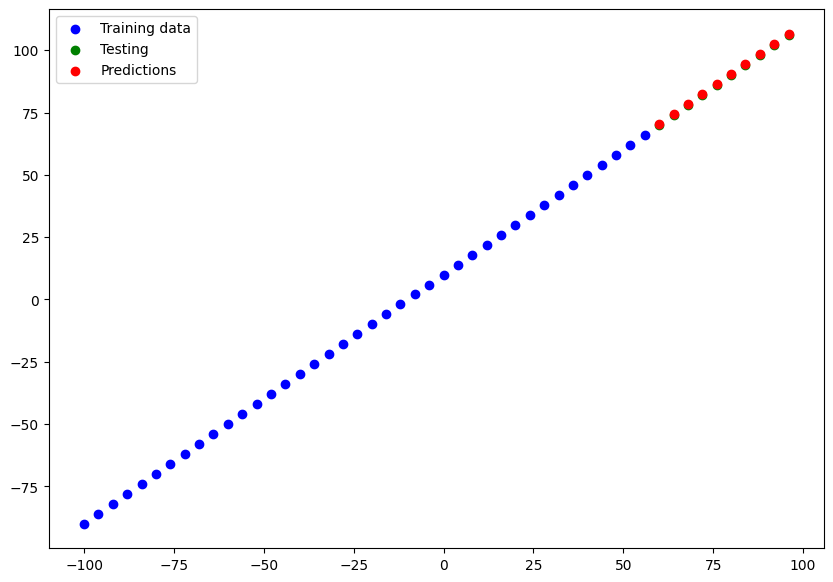

In [ ]:
plot_predictions(train_data=X_train,
                 train_labels=Y_train,
                 test_data=X_test,
                 test_labels=Y_test,
                 predictions=y_pred)

### Evaluating our model's predictions with regression evaluation metrics

Depending on the problem you're working with, there will be different evaluation metrics to evaluate your model's performance

Since we are working with regression, two of the main metrics:
* MAE - mean absolute error, "on average, how wrong is each of my model prediction"
* MSE - mean square error, "square the average erros"

In [ ]:
# Evaluate the model on test set
model.evaluate(X_test, Y_test)

1/1 [==============================] - 0s 128ms/step - loss: 0.4634 - mae: 0.4634


[0.46343764662742615, 0.46343764662742615]

In [ ]:
# Calculate the mean absolute error
mae = tf.metrics.mean_absolute_error(y_true=Y_test,
                                     y_pred=tf.constant(y_pred))
mae

<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([17.74715 , 14.590715, 12.247378, 10.717137, 10.      , 10.095963,
       11.005026, 12.727186, 15.262451, 18.610817], dtype=float32)>

In [ ]:
tf.constant(y_pred)

<tf.Tensor: shape=(10, 1), dtype=float32, numpy=
array([[ 70.31606 ],
       [ 74.34881 ],
       [ 78.38155 ],
       [ 82.414314],
       [ 86.44706 ],
       [ 90.47981 ],
       [ 94.512566],
       [ 98.54531 ],
       [102.578064],
       [106.61082 ]], dtype=float32)>

In [ ]:
Y_test

<tf.Tensor: shape=(10,), dtype=int32, numpy=array([ 70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>

In [ ]:
Y_test - y_pred

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[  0,   4,   8,  12,  16,  20,  24,  28,  32,  36],
       [ -4,   0,   4,   8,  12,  16,  20,  24,  28,  32],
       [ -8,  -4,   0,   4,   8,  12,  16,  20,  24,  28],
       [-12,  -8,  -4,   0,   4,   8,  12,  16,  20,  24],
       [-16, -12,  -8,  -4,   0,   4,   8,  12,  16,  20],
       [-20, -16, -12,  -8,  -4,   0,   4,   8,  12,  16],
       [-24, -20, -16, -12,  -8,  -4,   0,   4,   8,  12],
       [-28, -24, -20, -16, -12,  -8,  -4,   0,   4,   8],
       [-32, -28, -24, -20, -16, -12,  -8,  -4,   0,   4],
       [-36, -32, -28, -24, -20, -16, -12,  -8,  -4,   0]], dtype=int32)>

In [ ]:
y_pred - Y_test

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[  0,  -4,  -8, -12, -16, -20, -24, -28, -32, -36],
       [  4,   0,  -4,  -8, -12, -16, -20, -24, -28, -32],
       [  8,   4,   0,  -4,  -8, -12, -16, -20, -24, -28],
       [ 12,   8,   4,   0,  -4,  -8, -12, -16, -20, -24],
       [ 16,  12,   8,   4,   0,  -4,  -8, -12, -16, -20],
       [ 20,  16,  12,   8,   4,   0,  -4,  -8, -12, -16],
       [ 24,  20,  16,  12,   8,   4,   0,  -4,  -8, -12],
       [ 28,  24,  20,  16,  12,   8,   4,   0,  -4,  -8],
       [ 32,  28,  24,  20,  16,  12,   8,   4,   0,  -4],
       [ 36,  32,  28,  24,  20,  16,  12,   8,   4,   0]], dtype=int32)>

In [ ]:
tf.squeeze(y_pred)

<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([ 70.31606 ,  74.34881 ,  78.38155 ,  82.414314,  86.44706 ,
        90.47981 ,  94.512566,  98.54531 , 102.578064, 106.61082 ],
      dtype=float32)>

In [ ]:
# Calculate the mean absolute error
mae = tf.metrics.mean_absolute_error(y_true=Y_test,
                                     y_pred=tf.squeeze(y_pred))
mae

<tf.Tensor: shape=(), dtype=float32, numpy=0.4634369>

Calculate the mean square error
TensorFlow code for calculating MSE(mean square error)

`tf.keras.losses.MSE()` or
`tf.keras.mean_square_error()`

In [ ]:
# Calculate the mean square error
mse = tf.metrics.mean_squared_error(y_true=Y_test,
                                     y_pred=tf.squeeze(y_pred))
mse

<tf.Tensor: shape=(), dtype=float32, numpy=0.22362277>

In [ ]:
# Make some functions  to reuse MAE and MSE
def mae(y_true, y_pred):
  return tf.metrics.mean_absolute_error(y_true=y_true,
                                        y_pred=tf.squeeze(y_pred))

def mse(y_true, y_pred):
  return tf.metrics.mean_squared_error(y_true=y_true,
                                        y_pred=tf.squeeze(y_pred))

### Running experiments to improve our model

```
Build a model -> fit it -> evaluate it -> tweak it -> fit it -> evaluate it...
```

1. Get more data - get more examples for your model to train on (more opportunities to learn patterns or relationships between features and labels).
2.  Make your model larger (using a more complex model) - this might come in the form of more layers or more hidden units in each layer.
3. Train for longer - give your model more of a chance to find patterns in data.

Let's do 3 modelling experiments:

1. `model_1` - same as the original model, 1 layer, trained for 100 epochs.
2. `model_2` - 2 layers, trained for 100 epochs.
3. `model_3` - 2 layers, trained for hundred epochs.

**Build `model_1`**


In [ ]:
# Set random seed
tf.random.set_seed(42)

# 1. Create the model
model_1 = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model_1.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.SGD(),
                metrics = ["mae"])

# 3. Fit the model
model_1.fit(tf.expand_dims(X_train, axis=1), Y_train, epochs=100)

Epoch 1/100
2/2 [==============================] - 0s 8ms/step - loss: 70.9340 - mae: 70.9340
Epoch 2/100
2/2 [==============================] - 0s 4ms/step - loss: 35.6937 - mae: 35.6937
Epoch 3/100
2/2 [==============================] - 0s 4ms/step - loss: 7.6412 - mae: 7.6412
Epoch 4/100
2/2 [==============================] - 0s 4ms/step - loss: 10.0341 - mae: 10.0341
Epoch 5/100
2/2 [==============================] - 0s 3ms/step - loss: 11.0114 - mae: 11.0114
Epoch 6/100
2/2 [==============================] - 0s 4ms/step - loss: 10.1753 - mae: 10.1753
Epoch 7/100
2/2 [==============================] - 0s 4ms/step - loss: 9.1955 - mae: 9.1955
Epoch 8/100
2/2 [==============================] - 0s 4ms/step - loss: 9.1405 - mae: 9.1405
Epoch 9/100
2/2 [==============================] - 0s 4ms/step - loss: 15.2327 - mae: 15.2327
Epoch 10/100
2/2 [==============================] - 0s 4ms/step - loss: 7.8474 - mae: 7.8474
Epoch 11/100
2/2 [==============================] - 0s 4ms/step - l

1/1 [==============================] - 0s 42ms/step


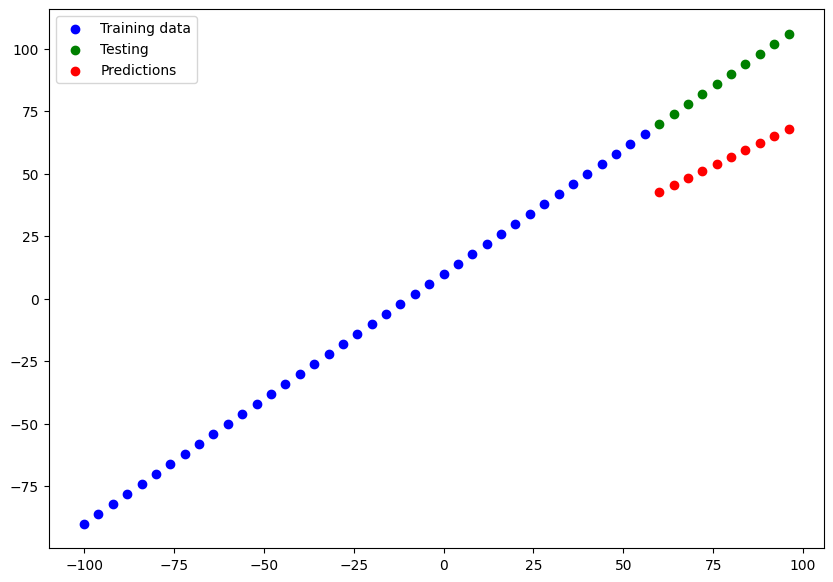

In [ ]:
# Make and plot predictions for model_1
y_preds_1 = model_1.predict(X_test)
plot_predictions(predictions=y_preds_1)

In [ ]:
tf.constant(y_preds_1), tf.squeeze(y_preds_1)

(<tf.Tensor: shape=(10, 1), dtype=float32, numpy=
 array([[42.887493],
        [45.660202],
        [48.43291 ],
        [51.20562 ],
        [53.978325],
        [56.751034],
        [59.523743],
        [62.296448],
        [65.06915 ],
        [67.841866]], dtype=float32)>,
 <tf.Tensor: shape=(10,), dtype=float32, numpy=
 array([42.887493, 45.660202, 48.43291 , 51.20562 , 53.978325, 56.751034,
        59.523743, 62.296448, 65.06915 , 67.841866], dtype=float32)>)

In [ ]:
# Calculate model_1 evaluation metrics
mae_1 = mae(Y_test, y_preds_1)
mse_1 = mse(Y_test, y_preds_1)
mae_1, mse_1



(<tf.Tensor: shape=(), dtype=float32, numpy=32.635323>,
 <tf.Tensor: shape=(), dtype=float32, numpy=1077.4907>)

**Build `model_2`**

* 2 dense layers, trained for 100 epochs

In [ ]:
# Set the random seed
tf.random.set_seed(42)

# 1. Creating the model_1
model_2 =  tf.keras.Sequential([
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

# 2. Compiling the model
model_2.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.SGD(),
                metrics=["mse"])

# Fit the model
model_2.fit(tf.expand_dims(X_train, axis=1), Y_train, epochs=200)

Epoch 1/200
2/2 [==============================] - 1s 8ms/step - loss: 34.6159 - mse: 1768.4398
Epoch 2/200
2/2 [==============================] - 0s 4ms/step - loss: 22.2952 - mse: 635.8081
Epoch 3/200
2/2 [==============================] - 0s 4ms/step - loss: 28.1333 - mse: 1162.0681
Epoch 4/200
2/2 [==============================] - 0s 4ms/step - loss: 24.9300 - mse: 907.5763
Epoch 5/200
2/2 [==============================] - 0s 4ms/step - loss: 13.2095 - mse: 212.8288
Epoch 6/200
2/2 [==============================] - 0s 4ms/step - loss: 10.6624 - mse: 124.8929
Epoch 7/200
2/2 [==============================] - 0s 4ms/step - loss: 11.6088 - mse: 164.7923
Epoch 8/200
2/2 [==============================] - 0s 4ms/step - loss: 10.7200 - mse: 124.2728
Epoch 9/200
2/2 [==============================] - 0s 4ms/step - loss: 35.9295 - mse: 1961.3918
Epoch 10/200
2/2 [==============================] - 0s 4ms/step - loss: 23.8424 - mse: 795.5883
Epoch 11/200
2/2 [============================

1/1 [==============================] - 0s 46ms/step


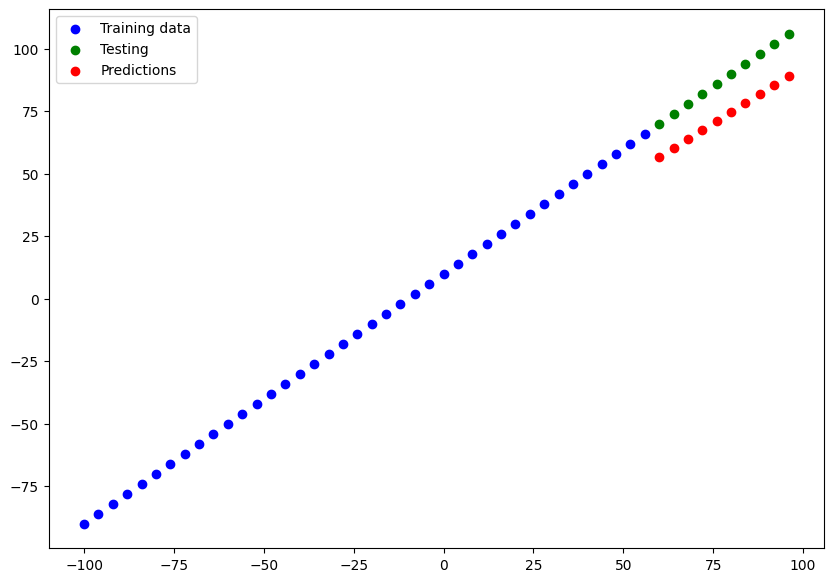

In [ ]:
# Make and plot a prediction for model_2
y_preds_2 = model_2.predict(X_test)
plot_predictions(predictions=y_preds_2)

In [ ]:
# Calculate model_2 evaluation metrics
mae_2 = mae(Y_test, y_preds_2)
mse_2 = mse(Y_test, y_preds_2)
mae_2, mse_2

(<tf.Tensor: shape=(), dtype=float32, numpy=15.01265>,
 <tf.Tensor: shape=(), dtype=float32, numpy=226.74667>)

**Build `model_3`**

* 2 layers, trained for 500 epochs


In [ ]:
# Set random seed
tf.random.set_seed(42)

# 1. Create a model
model_3 = tf.keras.Sequential([
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model_3.compile(loss = tf.keras.losses.mae,
                optimizer= tf.keras.optimizers.SGD(),
                metrics="mae")

# 3. Fit the model
model_3.fit(tf.expand_dims(X_train, axis=1), Y_train, epochs = 500)

Epoch 1/500
2/2 [==============================] - 0s 7ms/step - loss: 18.5082 - mae: 18.5082
Epoch 2/500
2/2 [==============================] - 0s 4ms/step - loss: 21.5991 - mae: 21.5991
Epoch 3/500
2/2 [==============================] - 0s 4ms/step - loss: 27.5548 - mae: 27.5548
Epoch 4/500
2/2 [==============================] - 0s 4ms/step - loss: 28.2510 - mae: 28.2510
Epoch 5/500
2/2 [==============================] - 0s 4ms/step - loss: 13.7574 - mae: 13.7574
Epoch 6/500
2/2 [==============================] - 0s 4ms/step - loss: 11.0461 - mae: 11.0461
Epoch 7/500
2/2 [==============================] - 0s 4ms/step - loss: 12.0354 - mae: 12.0354
Epoch 8/500
2/2 [==============================] - 0s 4ms/step - loss: 10.8479 - mae: 10.8479
Epoch 9/500
2/2 [==============================] - 0s 4ms/step - loss: 37.4329 - mae: 37.4329
Epoch 10/500
2/2 [==============================] - 0s 4ms/step - loss: 25.1090 - mae: 25.1090
Epoch 11/500
2/2 [==============================] - 0s 3ms/

1/1 [==============================] - 0s 48ms/step


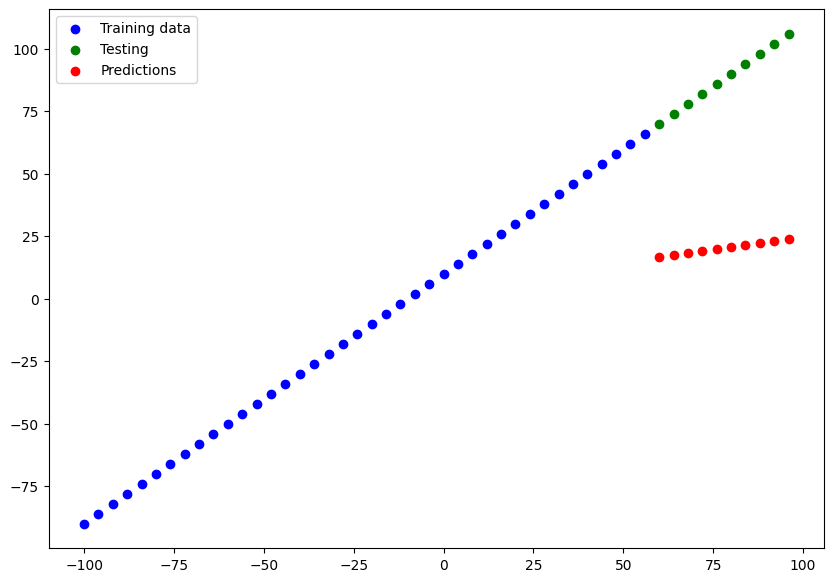

In [ ]:
# Make and plot some predictions
y_preds_3 = model_3.predict(X_test)

plot_predictions(predictions=y_preds_3)

In [ ]:
# Calculate model_3 evaluation metrics
mae_3 = mae(Y_test, y_preds_3)
mse_3 = mse(Y_test, y_preds_3)

mae_3, mse_3

(<tf.Tensor: shape=(), dtype=float32, numpy=67.66605>,
 <tf.Tensor: shape=(), dtype=float32, numpy=4662.7876>)

**🔑Note:**  You want  to start with small experiments(small models) a and make sure they work  and then increase
their scale when necessary.


## Comparing the results of our experiments

We've run a few experiments, let's compare the results

In [ ]:
# Let's comprare our model's results using  a pandas DataFrame
import pandas as pd
model_results = [["model_1", mae_1.numpy(), mse_1.numpy()],
                 ["model_2", mae_2.numpy(), mse_2.numpy()],
                 ["model_3", mae_3.numpy(), mse_3.numpy()]]

all_results = pd.DataFrame(model_results, columns=["model", "mae", "mse"])
all_results

,model,mae,mse
0,model_1,32.635323,1077.490723
1,model_2,15.012650,226.746674
2,model_3,67.666054,4662.787598


Looks like `model_2` performed the best

In [ ]:
model_2.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_9 (Dense)             (None, 10)                20        
                                                                 
 dense_10 (Dense)            (None, 1)                 11        
                                                                 
Total params: 31 (124.00 Byte)
Trainable params: 31 (124.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


**🔑Note**: One of my main goals should be to minimize the time between your experiments.
The more experiments you do, the more things you figure out which don't work and
in turn, get closer to figuring out  what does work.
Remember the machine learning practioner's motto: "experiment, experiment, experiment".

## Tracking your experiments

One really good habit in machine learning modelling is to track the results of
your experiment.

And when doing so, it can be tedious if you're running lots of experiment.

Luckily, there are tools to help us!

📖**Resource**: As you build more models, you'll want to look into using:

* TensorBoard - a component of the TensorFlow library to help track modelling
experiments(we'll see this one later).
* Weights & Biases - a tool for tracking all kinds of machine learning experiments
(plugs straight into TensorBoard)



## Saving our models

Saving our models allows us to use them outsite of Google Colab or (or where ever they were trained) such as in a web application, or a mobile app.

There are two main formats we can save our models too:

1. The `SaveModel` format
2. The `HDF5` format



In [ ]:
# Save model using SaveModel format
model_2.save("best_model_SavedModel_format")

In [ ]:
# Save the file using HDF5 format
model_2.save("best_model_HDF5format.hdf5")

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


## Loading in a saved mode


In [ ]:
# Load in the SavedModel format model
loaded_SavedModel_format = tf.keras.models.load_model("/content/best_model_SavedModel_format")
loaded_SavedModel_format.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_9 (Dense)             (None, 10)                20        
                                                                 
 dense_10 (Dense)            (None, 1)                 11        
                                                                 
Total params: 31 (124.00 Byte)
Trainable params: 31 (124.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
# Compare model_2 predictions with SavedModel format model predictions
model_2_preds = model_2.predict(X_test)
loaded_SavedModel_format_preds = loaded_SavedModel_format.predict(X_test)
model_2_preds == loaded_SavedModel_format_preds

1/1 [==============================] - 0s 49ms/step


array([[ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True]])

In [ ]:
# Load in the model using h5 format
loaded_h5_model = tf.keras.models.load_model("/content/best_model_HDF5format.hdf5")
loaded_h5_model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_9 (Dense)             (None, 10)                20        
                                                                 
 dense_10 (Dense)            (None, 1)                 11        
                                                                 
Total params: 31 (124.00 Byte)
Trainable params: 31 (124.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
# Compare the MAE of model_2_preds and loaded_SavedModel_preds
mae(y_true=Y_test, y_pred=model_2_preds) == mae(y_true=Y_test, y_pred=loaded_SavedModel_format_preds)

<tf.Tensor: shape=(), dtype=bool, numpy=True>

In [ ]:
# Check to see if loaded .h5 model predictions match model_2
model_2_preds = model_2.predict(X_test)
loaded_h5_model_preds = loaded_h5_model.predict(X_test)
model_2_preds == loaded_h5_model_preds

1/1 [==============================] - 0s 50ms/step


array([[ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True]])

In [ ]:
model_2_preds.squeeze() == loaded_SavedModel_format_preds.squeeze()


array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True])

In [ ]:
loaded_SavedModel_format_preds.squeeze()

array([56.819115, 60.412056, 64.005   , 67.59794 , 71.19088 , 74.78382 ,
       78.37676 , 81.9697  , 85.562645, 89.15558 ], dtype=float32)

## Download a model (or any other file ) from Google colab

If you want to download your files from Google Colab:

1. You can go to the "files" tab and right click on the file you're after and click "download".

2. Use code (see the cell below).
3. Save it to Google  Drive by connecting Google Drive and copying it there (see 2nd code celll below

In [ ]:
# Download a file from Google Colab
from google.colab import files
files.download("/content/best_model_HDF5format.hdf5")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
# Save a file from Google Colab to google Drive
!cp /content/best_model_HDF5format.hdf5 /content/drive/MyDrive/Jovian

In [ ]:
!ls /content/drive/MyDrive/Jovian

 best_model_HDF5format.hdf5  'matrasulov first-steps-with-python'


## A larger example

In [ ]:
# Import required libraries
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt


In [ ]:
# Read in insurance dataset
insurance = pd.read_csv("https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv")
insurance

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [ ]:
# Let's try one-hot encode our data frame so it's all numbers
insurance_one_hot = pd.get_dummies(insurance)
insurance_one_hot

,age,bmi,children,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,True,False,False,True,False,False,False,True
1,18,33.770,1,1725.55230,False,True,True,False,False,False,True,False
2,28,33.000,3,4449.46200,False,True,True,False,False,False,True,False
3,33,22.705,0,21984.47061,False,True,True,False,False,True,False,False
4,32,28.880,0,3866.85520,False,True,True,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...
1333,50,30.970,3,10600.54830,False,True,True,False,False,True,False,False
1334,18,31.920,0,2205.98080,True,False,True,False,True,False,False,False
1335,18,36.850,0,1629.83350,True,False,True,False,False,False,True,False
1336,21,25.800,0,2007.94500,True,False,True,False,False,False,False,True


In [ ]:
insurance_one_hot = insurance_one_hot.astype(int)
insurance_one_hot


,age,bmi,children,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27,0,16884,1,0,0,1,0,0,0,1
1,18,33,1,1725,0,1,1,0,0,0,1,0
2,28,33,3,4449,0,1,1,0,0,0,1,0
3,33,22,0,21984,0,1,1,0,0,1,0,0
4,32,28,0,3866,0,1,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1333,50,30,3,10600,0,1,1,0,0,1,0,0
1334,18,31,0,2205,1,0,1,0,1,0,0,0
1335,18,36,0,1629,1,0,1,0,0,0,1,0
1336,21,25,0,2007,1,0,1,0,0,0,0,1


In [ ]:
insurance_one_hot.head()

,age,bmi,children,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27,0,16884,1,0,0,1,0,0,0,1
1,18,33,1,1725,0,1,1,0,0,0,1,0
2,28,33,3,4449,0,1,1,0,0,0,1,0
3,33,22,0,21984,0,1,1,0,0,1,0,0
4,32,28,0,3866,0,1,1,0,0,1,0,0


In [ ]:
# Create X & y values (features and labels)
X = insurance_one_hot.drop("charges", axis = 1)
y = insurance_one_hot["charges"]

In [ ]:
# View X
X.head()

,age,bmi,children,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27,0,1,0,0,1,0,0,0,1
1,18,33,1,0,1,1,0,0,0,1,0
2,28,33,3,0,1,1,0,0,0,1,0
3,33,22,0,0,1,1,0,0,1,0,0
4,32,28,0,0,1,1,0,0,1,0,0


In [ ]:
# View y
y.head()

0    16884
1     1725
2     4449
3    21984
4     3866
Name: charges, dtype: int64

In [ ]:
# Create trainig and test sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
len(X), len(X_train), len(X_test)

(1338, 1070, 268)

In [ ]:
# Build a neural network(sort of like model_2 above)
tf.random.set_seed(42)

# 1. Creating the model
insurance_model = tf.keras.Sequential([
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
insurance_model.compile(loss=tf.keras.losses.mae,
                        optimizer=tf.keras.optimizers.SGD(),
                        metrics=["mae"])

# Fit the model
insurance_model.fit(tf.expand_dims(X_train, axis =1),y_train, epochs=100)

Epoch 1/100
34/34 [==============================] - 0s 1ms/step - loss: 8608.0215 - mae: 8608.0215
Epoch 2/100
34/34 [==============================] - 0s 1ms/step - loss: 7832.4185 - mae: 7832.4185
Epoch 3/100
34/34 [==============================] - 0s 1ms/step - loss: 7548.5469 - mae: 7548.5469
Epoch 4/100
34/34 [==============================] - 0s 1ms/step - loss: 7541.4014 - mae: 7541.4014
Epoch 5/100
34/34 [==============================] - 0s 1ms/step - loss: 7624.5513 - mae: 7624.5513
Epoch 6/100
34/34 [==============================] - 0s 1ms/step - loss: 7636.8535 - mae: 7636.8535
Epoch 7/100
34/34 [==============================] - 0s 1ms/step - loss: 7573.1040 - mae: 7573.1040
Epoch 8/100
34/34 [==============================] - 0s 1ms/step - loss: 7694.9507 - mae: 7694.9507
Epoch 9/100
34/34 [==============================] - 0s 1ms/step - loss: 7599.6333 - mae: 7599.6333
Epoch 10/100
34/34 [==============================] - 0s 1ms/step - loss: 7725.0034 - mae: 7725.0034

In [ ]:
# Check the results of the insurance model on the test data
insurance_model.evaluate(X_test, y_test)

9/9 [==============================] - 0s 2ms/step - loss: 7275.4619 - mae: 7275.4619


[7275.4619140625, 7275.4619140625]

In [ ]:
y_train.median()

9574.5

###Improve the largre model

Right now  it looks like our model isn't performing too well... let's try to improve it!

To (try) improve our model, we'll run 2 experiments:
1. Add an extra layer with more hidden units and use the Adam optimizer
2. Same as bove but train for longer(200 epochs)
3. Change activation method and set learning rate




Building `insurance_model_experiment`

In [ ]:
X_train, y_train

(      age  bmi  children  sex_female  sex_male  smoker_no  smoker_yes  \
 560    46   19         2           1         0          1           0   
 1285   47   24         0           1         0          1           0   
 1142   52   24         0           1         0          1           0   
 969    39   34         5           1         0          1           0   
 486    54   21         3           1         0          1           0   
 ...   ...  ...       ...         ...       ...        ...         ...   
 1095   18   31         4           1         0          1           0   
 1130   39   23         5           1         0          1           0   
 1294   58   25         0           0         1          1           0   
 860    37   47         2           1         0          0           1   
 1126   55   29         0           0         1          1           0   
 
       region_northeast  region_northwest  region_southeast  region_southwest  
 560                  0       

In [ ]:
# insurance_model_experiment
tf.random.set_seed(42)
# 1. Creating the model
insurance_model_experiment = tf.keras.Sequential([
    tf.keras.layers.Dense(10, activation="relu", ),
    tf.keras.layers.Dense(1)
])

# 2. Optimize the model
insurance_model_experiment.compile(loss=tf.keras.losses.mae,
                          optimizer = tf.keras.optimizers.Adam(learning_rate=0.01),
                          metrics=["mae"])

# 3. Fit the model
insurance_model_experiment.fit(tf.expand_dims(X_train, axis=1), y_train, epochs=150, verbose=2)


Epoch 1/150
34/34 - 1s - loss: 13340.5674 - mae: 13340.5674 - 647ms/epoch - 19ms/step
Epoch 2/150
34/34 - 0s - loss: 13274.6924 - mae: 13274.6924 - 42ms/epoch - 1ms/step
Epoch 3/150
34/34 - 0s - loss: 13129.7100 - mae: 13129.7100 - 43ms/epoch - 1ms/step
Epoch 4/150
34/34 - 0s - loss: 12892.8105 - mae: 12892.8105 - 39ms/epoch - 1ms/step
Epoch 5/150
34/34 - 0s - loss: 12561.4199 - mae: 12561.4199 - 37ms/epoch - 1ms/step
Epoch 6/150
34/34 - 0s - loss: 12133.1162 - mae: 12133.1162 - 37ms/epoch - 1ms/step
Epoch 7/150
34/34 - 0s - loss: 11615.6953 - mae: 11615.6953 - 40ms/epoch - 1ms/step
Epoch 8/150
34/34 - 0s - loss: 11024.9238 - mae: 11024.9238 - 40ms/epoch - 1ms/step
Epoch 9/150
34/34 - 0s - loss: 10400.6367 - mae: 10400.6367 - 37ms/epoch - 1ms/step
Epoch 10/150
34/34 - 0s - loss: 9793.8525 - mae: 9793.8525 - 38ms/epoch - 1ms/step
Epoch 11/150
34/34 - 0s - loss: 9212.0859 - mae: 9212.0859 - 37ms/epoch - 1ms/step
Epoch 12/150
34/34 - 0s - loss: 8676.2832 - mae: 8676.2832 - 38ms/epoch - 1m

In [ ]:
insurance_model_experiment.evaluate(tf.expand_dims(X_train, axis=1), y_train)

34/34 [==============================] - 0s 1ms/step - loss: 5388.3633 - mae: 5388.3633


[5388.36328125, 5388.36328125]

In [ ]:
# Set random seed
tf.random.set_seed(42)

# 1. Create the model
insurance_model_2 = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
insurance_model_2.compile(loss=tf.keras.losses.mae,
                          optimizer=tf.keras.optimizers.Adam(),
                          metrics=["mae"])

# 3. Fit the model
insurance_model_2.fit(tf.expand_dims(X_train, axis=1), y_train, epochs=100, verbose=1)

Epoch 1/100
34/34 [==============================] - 1s 2ms/step - loss: 13308.0117 - mae: 13308.0117
Epoch 2/100
34/34 [==============================] - 0s 2ms/step - loss: 13167.0400 - mae: 13167.0400
Epoch 3/100
34/34 [==============================] - 0s 2ms/step - loss: 12870.0762 - mae: 12870.0762
Epoch 4/100
34/34 [==============================] - 0s 1ms/step - loss: 12261.8438 - mae: 12261.8438
Epoch 5/100
34/34 [==============================] - 0s 1ms/step - loss: 11191.8125 - mae: 11191.8125
Epoch 6/100
34/34 [==============================] - 0s 2ms/step - loss: 9724.6904 - mae: 9724.6904
Epoch 7/100
34/34 [==============================] - 0s 1ms/step - loss: 8299.9375 - mae: 8299.9375
Epoch 8/100
34/34 [==============================] - 0s 1ms/step - loss: 7547.2944 - mae: 7547.2944
Epoch 9/100
34/34 [==============================] - 0s 1ms/step - loss: 7406.7471 - mae: 7406.7471
Epoch 10/100
34/34 [==============================] - 0s 1ms/step - loss: 7385.8306 - mae:

In [ ]:
# Evaluate the larger
insurance_model_2.evaluate(X_test, y_test)

9/9 [==============================] - 0s 2ms/step - loss: 4919.1328 - mae: 4919.1328


[4919.1328125, 4919.1328125]

In [ ]:
# previous the larger  `insurance_model`
insurance_model.evaluate(X_test, y_test)

9/9 [==============================] - 0s 1ms/step - loss: 7275.4619 - mae: 7275.4619


[7275.4619140625, 7275.4619140625]

In [ ]:
# Let's try `insurance_model_3`

# Set the random seed
tf.random.set_seed(42)

# 1. Create the model (same as above)
insurance_model_3 = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
insurance_model_3.compile(loss=tf.keras.losses.mae,
                          optimizer=tf.keras.optimizers.Adam(),
                          metrics=["mae"])

# 3. Fit the model
history = insurance_model_3.fit(tf.expand_dims(X_train, axis=1), y_train, epochs=200, verbose=1)

Epoch 1/200
34/34 [==============================] - 1s 2ms/step - loss: 13285.4434 - mae: 13285.4434
Epoch 2/200
34/34 [==============================] - 0s 2ms/step - loss: 13126.5742 - mae: 13126.5742
Epoch 3/200
34/34 [==============================] - 0s 1ms/step - loss: 12791.2939 - mae: 12791.2939
Epoch 4/200
34/34 [==============================] - 0s 1ms/step - loss: 12132.9229 - mae: 12132.9229
Epoch 5/200
34/34 [==============================] - 0s 1ms/step - loss: 11027.6768 - mae: 11027.6768
Epoch 6/200
34/34 [==============================] - 0s 1ms/step - loss: 9595.6133 - mae: 9595.6133
Epoch 7/200
34/34 [==============================] - 0s 1ms/step - loss: 8252.9053 - mae: 8252.9053
Epoch 8/200
34/34 [==============================] - 0s 1ms/step - loss: 7559.9395 - mae: 7559.9395
Epoch 9/200
34/34 [==============================] - 0s 1ms/step - loss: 7434.8237 - mae: 7434.8237
Epoch 10/200
34/34 [==============================] - 0s 1ms/step - loss: 7413.8735 - mae:

In [ ]:
# Let's evaluate the `insurance_model_3`
insurance_model_3.evaluate(X_test, y_test)

9/9 [==============================] - 0s 1ms/step - loss: 3500.9780 - mae: 3500.9780


[3500.97802734375, 3500.97802734375]

In [ ]:
# Compare with the 1st
insurance_model.evaluate(X_test, y_test)

9/9 [==============================] - 0s 1ms/step - loss: 7275.4619 - mae: 7275.4619


[7275.4619140625, 7275.4619140625]

Text(0.5, 0, 'epochs')

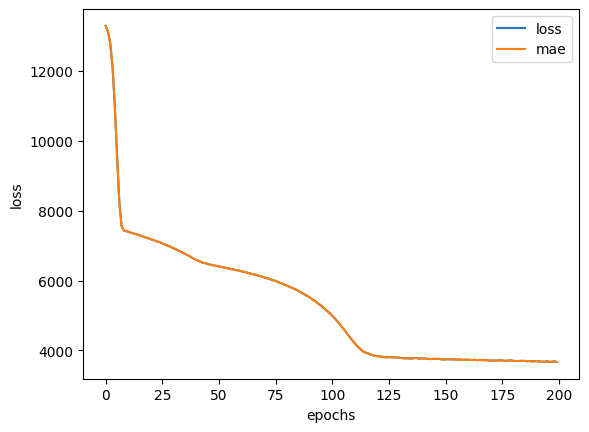

In [ ]:
# Plot history (also known as a loss curve or a training curve)
pd.DataFrame(history.history).plot()
plt.ylabel("loss")
plt.xlabel("epochs")

> 🤔**Question:** How long should it be trained for?

It depends. Really... it depends on the problem you're working on.
However, many people have asked this question before... so TensorFlow has a solution! It's called the [EarlyStopping Callback](https://www.tensorflow.org/api_docs/python/tf/keras/callbacks/EarlyStopping), which is a TensorFlow component you can add to your medel to stop taining once it stops a certain metric.

## Preprocessing data (normalization and standardization)

In terms of scaling values, neural networks tend to prefer normalizations.

If you're not sure on which to use, you could try both and see which perofrms better.

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf

# Read in the insurance dataframe
insurance = pd.read_csv("https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv")
insurance

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


To prepare our data, we can borrow a few classes from Scikit-Learn.

In [ ]:
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.model_selection import train_test_split
# Create a column transformer
ct = make_column_transformer(
    (MinMaxScaler(), ["age", "bmi", "children"]), # turn all values in these columns between 0 and 1
    (OneHotEncoder(handle_unknown="ignore"), ["sex", "smoker", "region"])
)

# Create X & y
X = insurance.drop("charges", axis=1)
y = insurance["charges"]

# Build our train and test sets
X_train, X_test, y_train, y_test= train_test_split(X, y, test_size=0.2, random_state=42)

# Fit the column transformer to our training data
ct.fit(X_train)

# Transform training and test data with normalization (MinMaxScaler) and OneHotEncoder
X_train_normal = ct.transform(X_train)
X_test_normal = ct.transform(X_test)

In [ ]:
# What does our data look like now?
X_train.loc[0]

age                19
sex            female
bmi              27.9
children            0
smoker            yes
region      southwest
Name: 0, dtype: object

In [ ]:
X_train_normal[0]

array([0.60869565, 0.10734463, 0.4       , 1.        , 0.        ,
       1.        , 0.        , 0.        , 1.        , 0.        ,
       0.        ])

In [ ]:
X_train.shape, X_train_normal.shape

((1070, 6), (1070, 11))

Beautiful! Our data has been normalized and one hot encoded.
Now let's build a neural network model on it and see how it goes


In [ ]:
insurance_model_2.summary()

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_17 (Dense)            (None, 1, 100)            1200      
                                                                 
 dense_18 (Dense)            (None, 1, 10)             1010      
                                                                 
 dense_19 (Dense)            (None, 1, 1)              11        
                                                                 
Total params: 2221 (8.68 KB)
Trainable params: 2221 (8.68 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
# Build a neural network model to fit on our normalized data( Fit the model on training dataset, and evaluate it on test dataset)

# Set the random seed
tf.random.set_seed(42)

# 1. Create the model
insurance_model_4 = tf.keras.Sequential([
    tf.keras.layers.Dense(1),
    tf.keras.layers.Dense(10)
])

# 2. Compile the model
insurance_model_4.compile(loss=tf.keras.losses.mae,
                     optimizer=tf.keras.optimizers.SGD(),
                     metrics="mae")

# 3. Fit the model
insurance_model_4.fit(tf.expand_dims(X_train_normal, axis=1), y_train, epochs=100, verbose=1)

Epoch 1/100
34/34 [==============================] - 0s 2ms/step - loss: 13346.1113 - mae: 13362.6113
Epoch 2/100
34/34 [==============================] - 0s 1ms/step - loss: 13346.0635 - mae: 13323.0156
Epoch 3/100
34/34 [==============================] - 0s 1ms/step - loss: 13346.0195 - mae: 13350.9883
Epoch 4/100
34/34 [==============================] - 0s 1ms/step - loss: 13345.9795 - mae: 13319.6309
Epoch 5/100
34/34 [==============================] - 0s 1ms/step - loss: 13345.9395 - mae: 13392.2910
Epoch 6/100
34/34 [==============================] - 0s 1ms/step - loss: 13345.8975 - mae: 13363.3896
Epoch 7/100
34/34 [==============================] - 0s 1ms/step - loss: 13345.8584 - mae: 13347.2412
Epoch 8/100
34/34 [==============================] - 0s 1ms/step - loss: 13345.8164 - mae: 13389.1777
Epoch 9/100
34/34 [==============================] - 0s 1ms/step - loss: 13345.7715 - mae: 13368.9297
Epoch 10/100
34/34 [==============================] - 0s 1ms/step - loss: 13345.72

In [ ]:
insurance_model_4.evaluate(X_test_normal, y_test)


9/9 [==============================] - 0s 1ms/step - loss: 8493.8438 - mae: 8493.8438


[8493.84375, 8493.84375]

Text(0.5, 0, 'epochs')

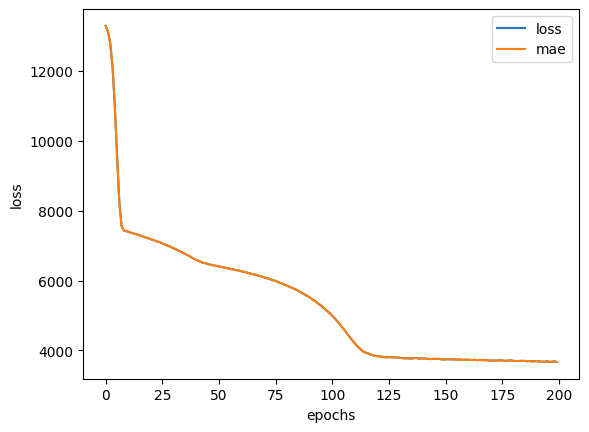

In [ ]:
# Plot the history (also known as a loss curve or a training curve)
pd.DataFrame(history.history).plot()
plt.ylabel("loss")
plt.xlabel("epochs")


In [ ]:
# Build a neural network model  to fit our normalized data

# Let's improve our model
# Setting the random seed
tf.random.set_seed(42)

# 1. Create the model (this lets add more layers with 100 neurons)
insurance_model_4 = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

# 2. Compile the model (here, let's change the optimizer from SGD to ADAM)
insurance_model_4.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.Adam(),
              metrics = ["mae"])

# 3. Fit the model
insurance_model_4.fit(tf.expand_dims(X_train_normal, axis=1), y_train, epochs=100, verbose=1)

Epoch 1/100
34/34 [==============================] - 1s 2ms/step - loss: 13343.7998 - mae: 13343.7998
Epoch 2/100
34/34 [==============================] - 0s 2ms/step - loss: 13334.0752 - mae: 13334.0752
Epoch 3/100
34/34 [==============================] - 0s 2ms/step - loss: 13309.3301 - mae: 13309.3301
Epoch 4/100
34/34 [==============================] - 0s 1ms/step - loss: 13257.8174 - mae: 13257.8174
Epoch 5/100
34/34 [==============================] - 0s 2ms/step - loss: 13168.4326 - mae: 13168.4326
Epoch 6/100
34/34 [==============================] - 0s 1ms/step - loss: 13030.6680 - mae: 13030.6680
Epoch 7/100
34/34 [==============================] - 0s 1ms/step - loss: 12834.5195 - mae: 12834.5195
Epoch 8/100
34/34 [==============================] - 0s 1ms/step - loss: 12570.0332 - mae: 12570.0332
Epoch 9/100
34/34 [==============================] - 0s 2ms/step - loss: 12227.2314 - mae: 12227.2314
Epoch 10/100
34/34 [==============================] - 0s 2ms/step - loss: 11805.90

In [ ]:
#9/9 [==============================] - 0s 3ms/step - loss: 4920.9062 - mae: 4920.9062
[4920.90625, 4920.90625]


[4920.90625, 4920.90625]

Normalizng data does not guranrtee good results, but it is something woth trying

In [ ]:
# EValuate out insurance model trained on normalized data
insurance_model_4.evaluate(X_test_normal, y_test)

9/9 [==============================] - 0s 1ms/step - loss: 3436.3894 - mae: 3436.3894


[3436.389404296875, 3436.389404296875]

<Axes: ylabel='Frequency'>

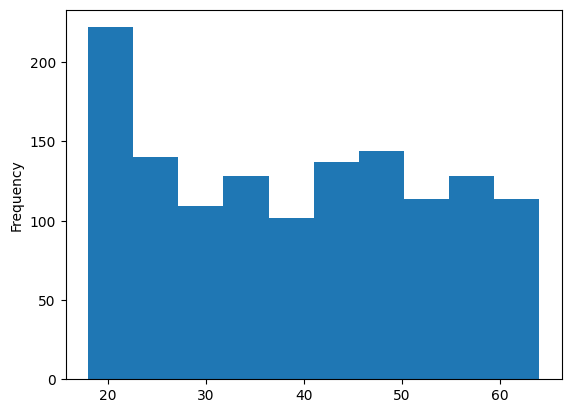

In [ ]:
X["age"].plot(kind="hist")

<Axes: ylabel='Frequency'>

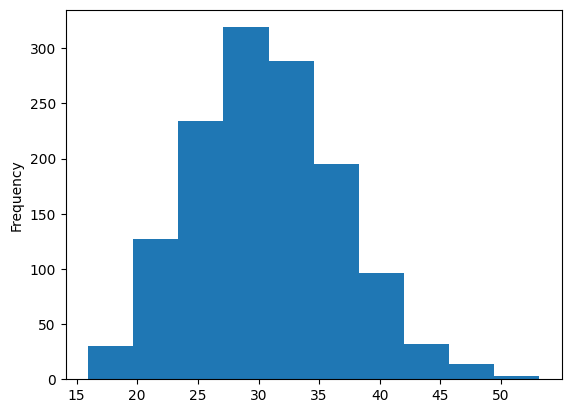

In [ ]:
X["bmi"].plot(kind="hist")

In [ ]:
X["children"].value_counts()

children
0    574
1    324
2    240
3    157
4     25
5     18
Name: count, dtype: int64

### TenorFlow regression challenge

🛠 Exercises

We've a covered a whole lot pretty quickly.

So now it's time to have a play around with a few things and start to build up your intuition.

I emphasise the words play around because that's very important. Try a few things out, run the code and see what happens.

Create your own regression dataset (or make the one we created in "Create data to view and fit" bigger) and build fit a model to it.
Try building a neural network with 4 Dense layers and fitting it to your own regression dataset, how does it perform?
Try and improve the results we got on the insurance dataset, some things you might want to try include:
Building a larger model (how does one with 4 dense layers go?).
Increasing the number of units in each layer.
Lookup the documentation of Adam and find out what the first parameter is, what happens if you increase it by 10x?
What happens if you train for longer (say 300 epochs instead of 200)?


In [ ]:
a = tf.range(-250 , 250, 5)
a

<tf.Tensor: shape=(100,), dtype=int32, numpy=
array([-250, -245, -240, -235, -230, -225, -220, -215, -210, -205, -200,
       -195, -190, -185, -180, -175, -170, -165, -160, -155, -150, -145,
       -140, -135, -130, -125, -120, -115, -110, -105, -100,  -95,  -90,
        -85,  -80,  -75,  -70,  -65,  -60,  -55,  -50,  -45,  -40,  -35,
        -30,  -25,  -20,  -15,  -10,   -5,    0,    5,   10,   15,   20,
         25,   30,   35,   40,   45,   50,   55,   60,   65,   70,   75,
         80,   85,   90,   95,  100,  105,  110,  115,  120,  125,  130,
        135,  140,  145,  150,  155,  160,  165,  170,  175,  180,  185,
        190,  195,  200,  205,  210,  215,  220,  225,  230,  235,  240,
        245], dtype=int32)>

In [ ]:
b = 2*a+5
b

<tf.Tensor: shape=(100,), dtype=int32, numpy=
array([-495, -485, -475, -465, -455, -445, -435, -425, -415, -405, -395,
       -385, -375, -365, -355, -345, -335, -325, -315, -305, -295, -285,
       -275, -265, -255, -245, -235, -225, -215, -205, -195, -185, -175,
       -165, -155, -145, -135, -125, -115, -105,  -95,  -85,  -75,  -65,
        -55,  -45,  -35,  -25,  -15,   -5,    5,   15,   25,   35,   45,
         55,   65,   75,   85,   95,  105,  115,  125,  135,  145,  155,
        165,  175,  185,  195,  205,  215,  225,  235,  245,  255,  265,
        275,  285,  295,  305,  315,  325,  335,  345,  355,  365,  375,
        385,  395,  405,  415,  425,  435,  445,  455,  465,  475,  485,
        495], dtype=int32)>

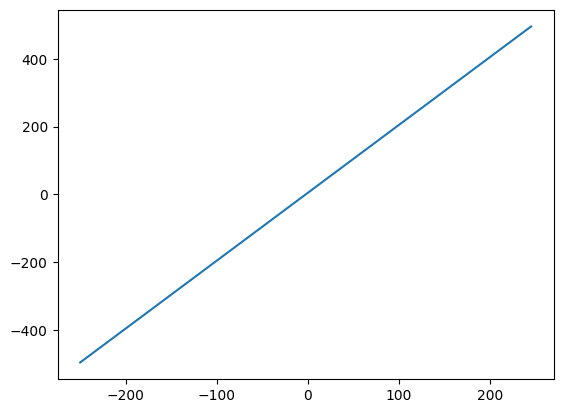

In [ ]:
# Visualize the data
import matplotlib.pyplot as plt

plt.plot(a, b)

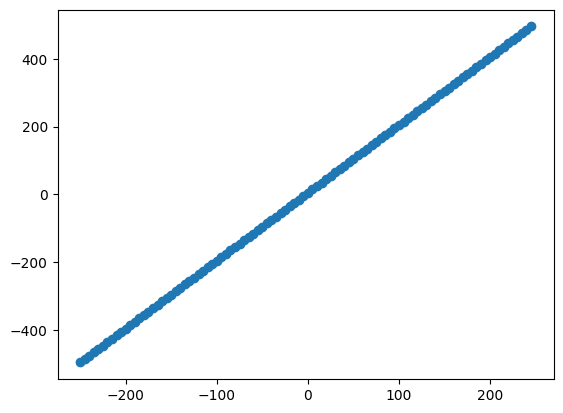

In [ ]:
plt.scatter(a, b)

In [ ]:
# Check the length to see how many data we have
len(a), len(b)

(100, 100)

In [ ]:
# Split the data into 80% trainin data, 20% test data

# Training set
a_train = a[:80]
b_train = b[:80]

# Test set
a_test = a[80:]
b_test = b[80:]


# Let's see the length of test and train data set
len(a_train), len(a_test), len(b_train), len(b_test)

(80, 20, 80, 20)

#### Visualizng the data

Now we've got our data in training and test set... let's visualize it again!

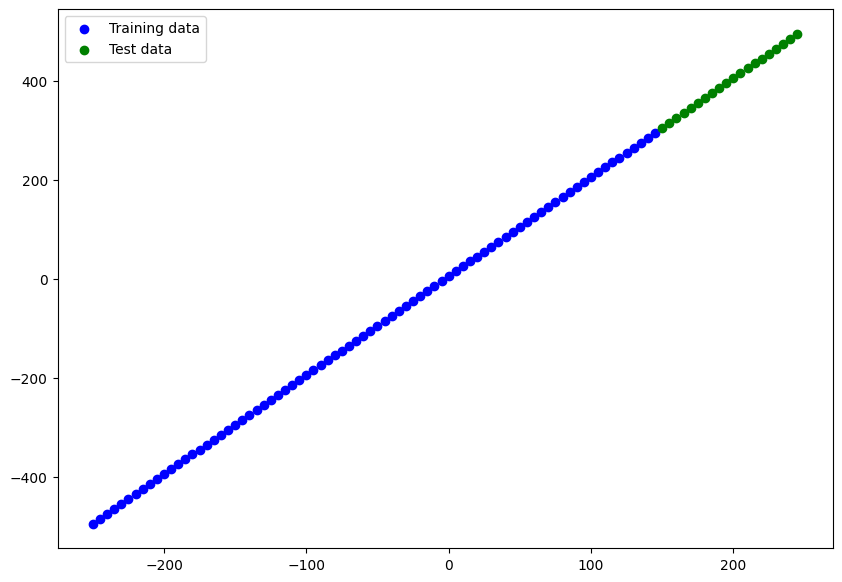

In [ ]:
plt.figure(figsize=(10, 7))

# Plot the training data in blue
plt.scatter(a_train, b_train, c="b", label="Training data")

# Plot test data in green
plt.scatter(a_test, b_test, c="g", label="Test data")

# Show a legend
plt.legend()

In [ ]:
# Let's build our model

# 1. Create the model
model_c = tf.keras.Sequential([
    tf.keras.layers.Dense(1),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(50),
    tf.keras.layers.Dense(100)
])


# 2. Compile the model
model_c.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.SGD(),
                metrics=["mae"])

# 3. Fit the model
model_c.fit(tf.expand_dims(a_train, axis=1), b_train, epochs=200, verbose=1)

Epoch 1/200
3/3 [==============================] - 0s 3ms/step - loss: 197.2030 - mae: 197.2030
Epoch 2/200
3/3 [==============================] - 0s 3ms/step - loss: 119.8052 - mae: 119.8052
Epoch 3/200
3/3 [==============================] - 0s 3ms/step - loss: 99.1935 - mae: 99.1935
Epoch 4/200
3/3 [==============================] - 0s 3ms/step - loss: 200.1718 - mae: 200.1718
Epoch 5/200
3/3 [==============================] - 0s 3ms/step - loss: 210.3572 - mae: 210.3572
Epoch 6/200
3/3 [==============================] - 0s 3ms/step - loss: 207.7290 - mae: 207.7290
Epoch 7/200
3/3 [==============================] - 0s 3ms/step - loss: 197.0754 - mae: 197.0754
Epoch 8/200
3/3 [==============================] - 0s 3ms/step - loss: 141.8848 - mae: 141.8848
Epoch 9/200
3/3 [==============================] - 0s 3ms/step - loss: 201.8815 - mae: 201.8815
Epoch 10/200
3/3 [==============================] - 0s 3ms/step - loss: 152.4705 - mae: 152.4705
Epoch 11/200
3/3 [=======================

In [ ]:
# Let's evaluate our model
model_c.evaluate(a_test, b_test)

1/1 [==============================] - 0s 121ms/step - loss: 381.9730 - mae: 381.9730


[381.97296142578125, 381.97296142578125]

In [ ]:
model_c.summary()

Model: "sequential_14"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_28 (Dense)            (None, 1)                 2         
                                                                 
 dense_29 (Dense)            (None, 10)                20        
                                                                 
 dense_30 (Dense)            (None, 50)                550       
                                                                 
 dense_31 (Dense)            (None, 100)               5100      
                                                                 
Total params: 5672 (22.16 KB)
Trainable params: 5672 (22.16 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
b_pred = model_c.predict(a_test)
b_pred = b_pred.squeeze()
b_pred

1/1 [==============================] - 0s 58ms/step


array([[ 7.9841247,  8.391498 ,  8.488277 , ..., 18.560812 , 21.72074  ,
        15.920849 ],
       [ 8.250682 ,  8.671707 ,  8.771738 , ..., 19.180035 , 22.445496 ,
        16.452164 ],
       [ 8.5172415,  8.951916 ,  9.055202 , ..., 19.799253 , 23.170244 ,
        16.98348  ],
       ...,
       [12.515612 , 13.15505  , 13.307115 , ..., 29.087587 , 34.04156  ,
        24.95322  ],
       [12.782165 , 13.435257 , 13.590572 , ..., 29.70681  , 34.76632  ,
        25.48454  ],
       [13.048721 , 13.715464 , 13.874035 , ..., 30.326025 , 35.49107  ,
        26.015854 ]], dtype=float32)

In [ ]:
# # Let's see our model
# b_pred = model_c.predict(a_test)
# b_pred = b_pred.squeeze()  # Add this line to flatten predictions

# plot_predictions(train_data=a_train,
#                  train_labels=b_train,
#                  test_data=a_test,
#                  test_labels=b_test,
#                  predictions=b_pred)

1/1 [==============================] - 0s 22ms/step


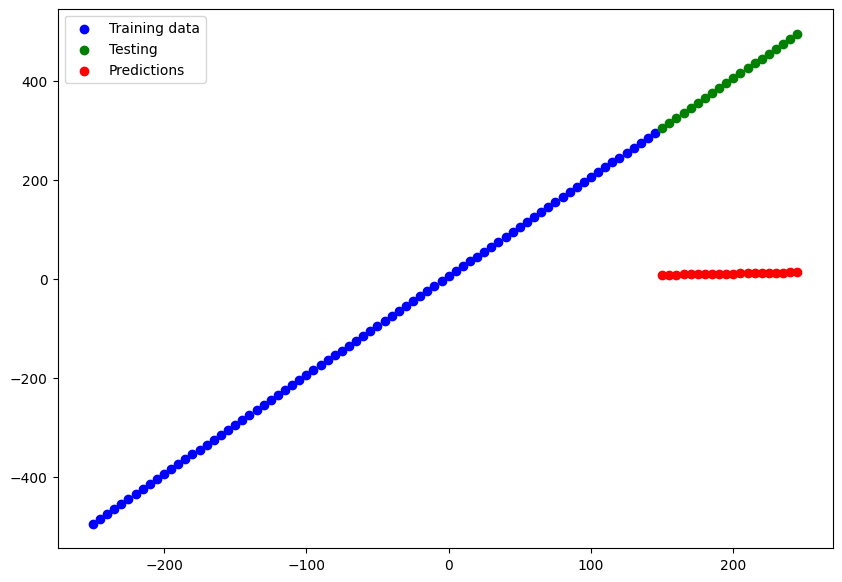

In [ ]:
# Let's see our model
b_pred = model_c.predict(a_test)
b_pred = b_pred.squeeze()  # Add this line to flatten predictions
# Ensure b_pred is a 1D array for plotting
b_pred = b_pred[:, 0]  # Select the first (and only) column if it's 2D

plot_predictions(train_data=a_train,
                 train_labels=b_train,
                 test_data=a_test,
                 test_labels=b_test,
                 predictions=b_pred)

In [ ]:
# Let's improve our model

 # 1. Create the layer
model_c_1 = tf.keras.Sequential([
    tf.keras.layers.Dense(1),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(50),
    tf.keras.layers.Dense(100)
 ])

# 2. Compile the model
model_c_1.compile(loss=tf.keras.losses.mae,
                  optimizer=tf.keras.optimizers.Adam(),
                  metrics=["mae"])

# 3. Fit the model
model_c_1.fit(tf.expand_dims(a_train, axis=1), b_train, epochs=300, verbose=1)

Epoch 1/300
3/3 [==============================] - 1s 3ms/step - loss: 212.6812 - mae: 212.6812
Epoch 2/300
3/3 [==============================] - 0s 3ms/step - loss: 211.6310 - mae: 211.6310
Epoch 3/300
3/3 [==============================] - 0s 3ms/step - loss: 210.6478 - mae: 210.6478
Epoch 4/300
3/3 [==============================] - 0s 3ms/step - loss: 209.5477 - mae: 209.5477
Epoch 5/300
3/3 [==============================] - 0s 3ms/step - loss: 208.3933 - mae: 208.3933
Epoch 6/300
3/3 [==============================] - 0s 3ms/step - loss: 207.0546 - mae: 207.0546
Epoch 7/300
3/3 [==============================] - 0s 3ms/step - loss: 205.6218 - mae: 205.6218
Epoch 8/300
3/3 [==============================] - 0s 3ms/step - loss: 204.0385 - mae: 204.0385
Epoch 9/300
3/3 [==============================] - 0s 3ms/step - loss: 202.1378 - mae: 202.1378
Epoch 10/300
3/3 [==============================] - 0s 3ms/step - loss: 200.1023 - mae: 200.1023
Epoch 11/300
3/3 [=====================

In [ ]:
# Let's evaluate the model
model_c_1.evaluate(a_test, b_test)

1/1 [==============================] - 0s 115ms/step - loss: 0.5720 - mae: 0.5720


[0.5720186829566956, 0.5720186829566956]

In [ ]:
b_pred_1 = model_c_1.predict(a_test)
b_pred_1 = b_pred_1[:, 0]

1/1 [==============================] - 0s 60ms/step


In [ ]:
b_pred_1.shape

(20,)

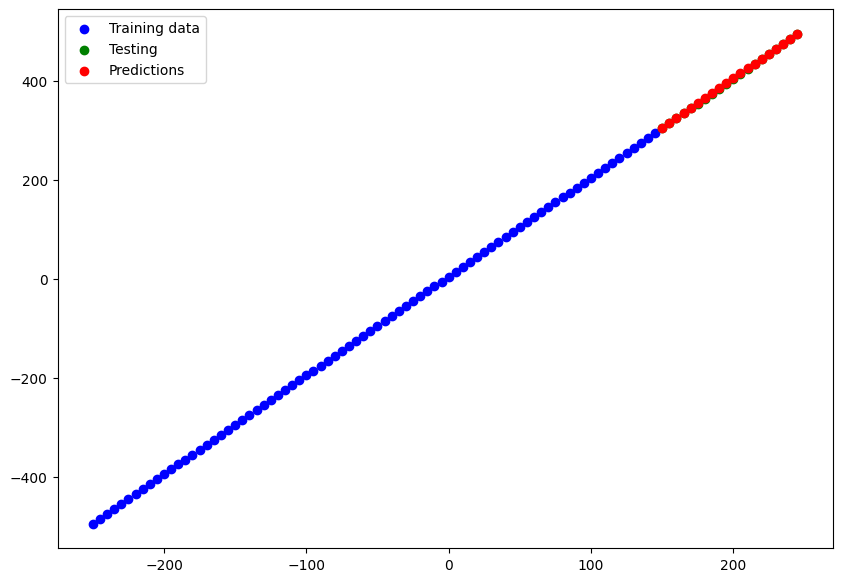

In [ ]:
# Let's plot the graph to check how accurate is our model

plot_predictions(train_data=a_train,
                 train_labels=b_train,
                 test_data=a_test,
                 test_labels=b_test,
                 predictions=b_pred_1)

In [ ]:
model_c_1.summary()

Model: "sequential_15"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_32 (Dense)            (None, 1)                 2         
                                                                 
 dense_33 (Dense)            (None, 10)                20        
                                                                 
 dense_34 (Dense)            (None, 50)                550       
                                                                 
 dense_35 (Dense)            (None, 100)               5100      
                                                                 
Total params: 5672 (22.16 KB)
Trainable params: 5672 (22.16 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
